# **Exploratory Data Analysis**

## **Imports**

In [7]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa

## **A Quick Look at the Data**

In [2]:
df = pd.read_csv('data/samples.csv', usecols=['file', 'class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    750 non-null    object
 1   class   750 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


### Class Distribution

Text(0.5, 1.0, 'Class Distribution')

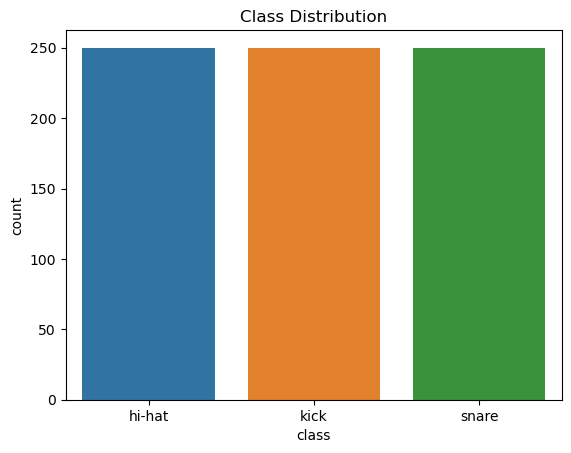

In [3]:
class_counts = pd.DataFrame(df['class'].value_counts()).reset_index()
sns.barplot(
    data = class_counts,
    x = 'class',
    y = 'count',
).set_title(
    'Class Distribution'
)


## **Looking at the Samples**

### Loading a Few Audio Samples

In [4]:
signals = {}

for label in df['class'].unique():
    class_df = df[df['class'] == label]
    f_names = class_df['file'].head(5).to_list()

    for f in f_names:
        signal, rate = torchaudio.load('data/raw/'+f)
        signals[f] = signal

### Plotting the Waveforms

In [5]:
def plot_waveform(signal, rate=44100, title='Waveform', ax=None):
    signal = signal.numpy()
    n_channels, n_frames = signal.shape
    time_axis = torch.arange(0, n_frames) / rate

    if ax == None:
        ax = plt.gca()
    ax.plot(time_axis, signal[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


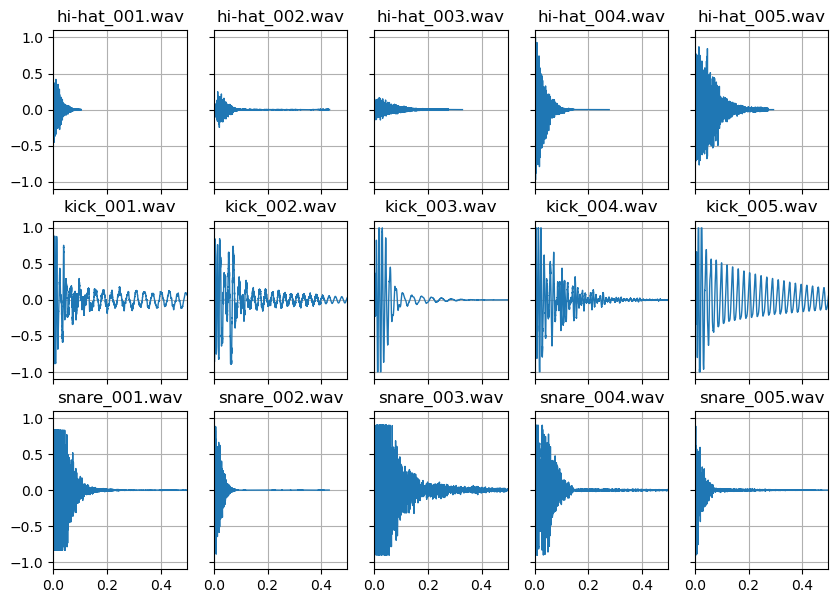

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, signal) in zip(axes, signals.items()):
    plot_waveform(signal, title=f_name, ax=ax)

### Plotting the Spectrograms

In [18]:
def plot_spectrograms(signal, title='Spectrogram', ax=None):
    spec = spectrogram(signal[0])
    n_channels, n_frames = signal.shape
    time_axis = torch.arange(0, n_frames) / rate

    if ax == None:
        ax = plt.gca()
    ax.imshow(
        librosa.power_to_db(spec),
        origin='lower', 
        aspect='auto'
        # interpolation='nearest'
    )
    ax.set_title(title)

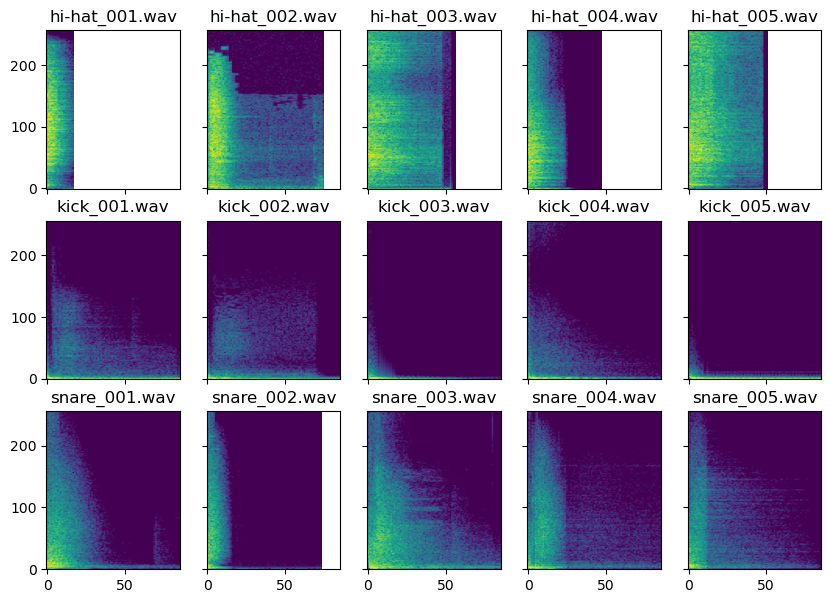

In [19]:
spectrogram = T.Spectrogram(n_fft=512)

fig, axes = plt.subplots(3, 5, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (f_name, signal) in zip(axes, signals.items()):
    plot_spectrograms(signal, title=f_name, ax=ax)